In [1]:

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Data2.csv", delimiter=';', decimal=',').rename(columns={'Populatiion':'Population'})

In [3]:
df.head()


,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0


In [4]:
df.tail()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0
216,Zimbabwe,Sub-Saharan Africa,1029.076649,16150362.0,12020.426,390760.0


In [5]:
num_cols = df.select_dtypes(include=np.number)
num_cols.fillna(num_cols.mean(), inplace=True)
df = pd.concat([df.select_dtypes(exclude=np.number), num_cols], axis=1)
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13374.833168,102951.0,165114.116337,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610.0


In [6]:
df.Area = df.Area.abs()
df['GDP per capita'] = df['GDP per capita'].abs()

Text(0.5, 1.0, 'Площи країн')

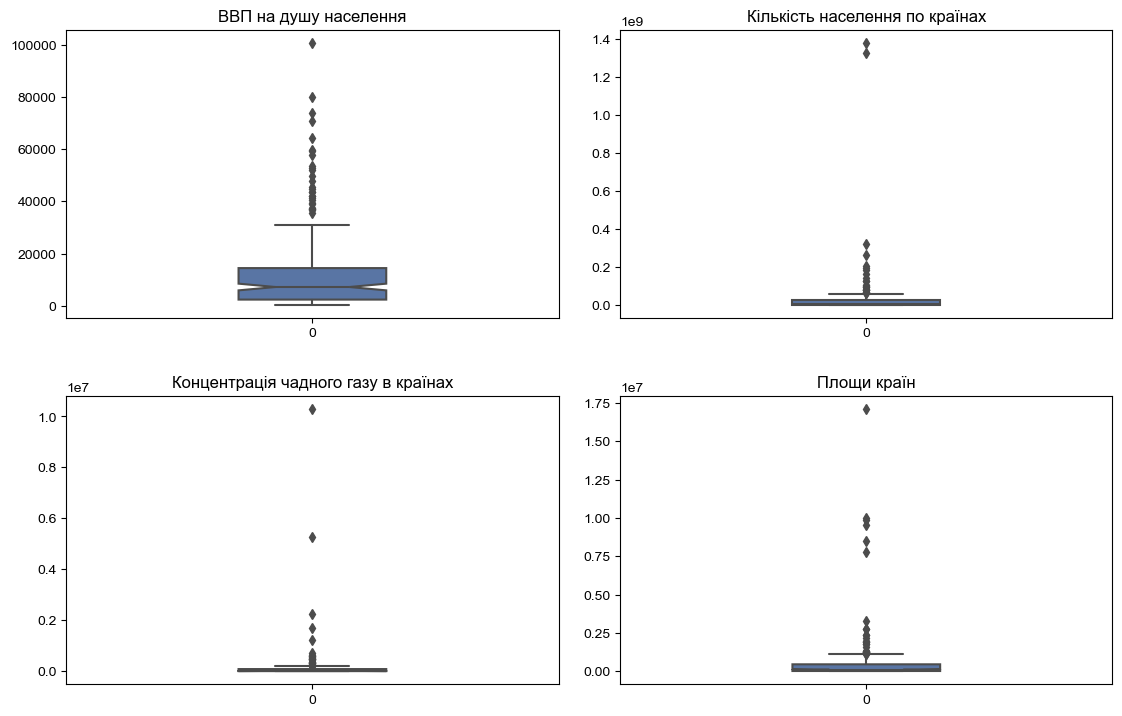

In [7]:
fig, axes = plt.subplots(2,2,figsize=(13.5,8.5))
fig.subplots_adjust(hspace=0.27, wspace=0.125)
sns.set(style='darkgrid')

sns.boxplot(ax=axes[0,0], data=df['GDP per capita'], width=0.3, notch=True)
axes[0,0].set_title('ВВП на душу населення')

sns.boxplot(ax=axes[0,1], data=df.Population, width=0.3)
axes[0,1].set_title('Кількість населення по країнах')

sns.boxplot(ax=axes[1,0], data=df['CO2 emission'], width=0.3, notch=True)
axes[1,0].set_title('Концентрація чадного газу в країнах')

sns.boxplot(ax=axes[1,1], data=df.Area, width=0.3, notch=True)
axes[1,1].set_title('Площи країн')

Text(0.5, 1.0, 'Концентрація чадного газу в країнах')

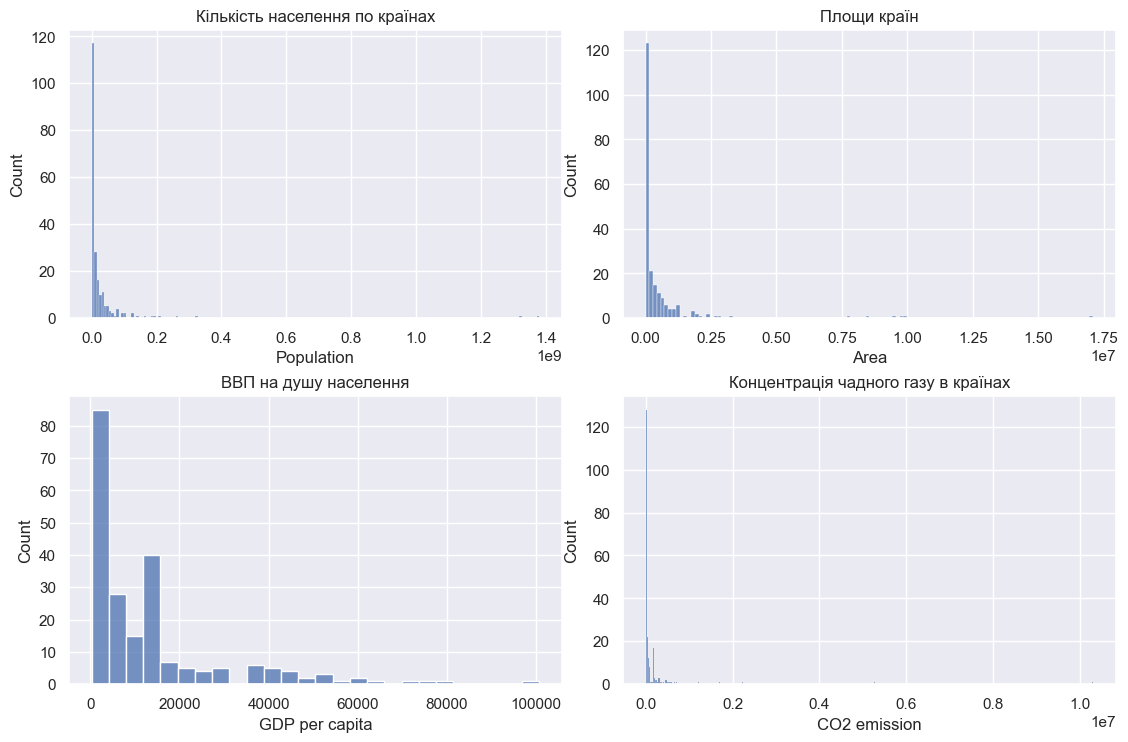

In [8]:
fig, axes = plt.subplots(2,2,figsize=(13.5,8.5))
fig.subplots_adjust(hspace=0.27, wspace=0.125)

sns.histplot(ax=axes[0,0], data=df.Population)
axes[0,0].set_title('Кількість населення по країнах')

sns.histplot(ax=axes[0,1], data=df.Area)
axes[0,1].set_title('Площи країн')

sns.histplot(ax=axes[1,0], data=df['GDP per capita'])
axes[1,0].set_title('ВВП на душу населення')

sns.histplot(ax=axes[1,1], data=df['CO2 emission'])
axes[1,1].set_title('Концентрація чадного газу в країнах')

In [9]:
df['Population Density'] = df.Population / df.Area
df

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13374.833168,102951.0,165114.116337,350.0,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020.0,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970.0,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610.0,22.045136


In [10]:
print(f"{df.iloc[df.Area.idxmin()]['Country Name']} - країна, яка займає найменшу площу, а саме {df.iloc[df.Area.idxmin()]['Area']} кв км")

Monaco - країна, яка займає найменшу площу, а саме 2.0 кв км


In [11]:
print(f"{df.iloc[df['GDP per capita'].idxmax()]['Country Name']} - країна, яка найбільший ВВП на душу населення, а саме {df.iloc[df['GDP per capita'].idxmax()]['GDP per capita']}$")

Luxembourg - країна, яка найбільший ВВП на душу населення, а саме 100738.6842$


In [12]:
mean_area_by_region = df.groupby('Region').Area.mean()
largest_mean_area, region_with_largest_mean = mean_area_by_region.max(), mean_area_by_region.idxmax()
print(f'Середня площа країни найбільша в регіоні {region_with_largest_mean}, а саме - {largest_mean_area:.2f} кв. км.')

Середня площа країни найбільша в регіоні North America, а саме - 6605410.00 кв. км.


In [13]:
country_with_highest_density = df.loc[df['Population Density'].idxmax(), 'Country Name']
print(f"Країна з найбільшої щільністю населення у світі - {country_with_highest_density}")

Країна з найбільшої щільністю населення у світі - Macao SAR, China


In [14]:
df_euca = df[df.Region == 'Europe & Central Asia']
country = df_euca.loc[df_euca['Population Density'].idxmax(), 'Country Name']
print(f'Країна з найбільшої щільністю населення в регіоні Europe & Central Asia - {country}')

Країна з найбільшої щільністю населення в регіоні Europe & Central Asia - Monaco


In [15]:
df['Total GDP'] = df.Population * df['GDP per capita']
grouped_df = df.groupby('Region')['Total GDP'].agg(['mean', 'median'])

# проверка, есть ли регион, в котором среднее значение равно медиане
equal_mean_median = []
for region, row in grouped_df.iterrows():
    mean = row['mean']
    median = row['median']
    print(f"=={region}==\n Середнє: {mean:.2f}$, медіана: {median:.2f}$\n")
    if mean == median:
        equal_mean_median.append(region)

if len(equal_mean_median) > 0:
    print('Регіони, в яких середнє значення ввп дорівнює медіані: ')
    print(equal_mean_median)
else:
    print('Немає регіонів, в яких середнє значення ввп дорівнює медіані!')

==East Asia & Pacific==
 Середнє: 601314797021.50$, медіана: 11400653732.56$

==Europe & Central Asia==
 Середнє: 349091144622.72$, медіана: 49052249268.26$

==Latin America & Caribbean==
 Середнє: 128573963145.39$, медіана: 13643876718.91$

==Middle East & North Africa==
 Середнє: 161162758088.26$, медіана: 102047824411.43$

==North America==
 Середнє: 6718676588591.59$, медіана: 1530680973899.02$

==South Asia==
 Середнє: 361745128122.77$, медіана: 52017740706.31$

==Sub-Saharan Africa==
 Середнє: 49945863170.16$, медіана: 10981369640.35$

Немає регіонів, в яких середнє значення ввп дорівнює медіані!


In [16]:
df['CO2 emission per capita'] = df['CO2 emission'] / df['Population']
df_sorted = df.sort_values(['GDP per capita'], ascending=False)
print('Top 5 countries by GDP per capita:\n', df_sorted.head()[['Country Name', 'GDP per capita']],
     '\n\nThe last 5 countries by GDP per capita:\n', df_sorted.tail()[['Country Name', 'GDP per capita']])

Top 5 countries by GDP per capita:
          Country Name  GDP per capita
115        Luxembourg    100738.68420
188       Switzerland     79887.51824
116  Macao SAR, China     74017.18471
146            Norway     70868.12250
92            Ireland     64175.43824 

The last 5 countries by GDP per capita:
                  Country Name  GDP per capita
118                Madagascar      401.742270
37   Central African Republic      382.213174
134                Mozambique      382.069330
119                    Malawi      300.307665
31                    Burundi      285.727442


In [17]:
df_sorted = df.sort_values(['CO2 emission per capita'], ascending=False)
print('Top 5 countries by СО2 emission per capita:\n', df_sorted.head()[['Country Name', 'CO2 emission per capita']],
     '\n\nThe last 5 countries by СО2 emission per capita:\n', df_sorted.tail()[['Country Name', 'CO2 emission per capita']])

Top 5 countries by СО2 emission per capita:
                  Country Name  CO2 emission per capita
182  St. Martin (French part)                 5.168053
163                San Marino                 4.972867
130                    Monaco                 4.288790
145  Northern Mariana Islands                 3.000820
3              American Samoa                 2.969732 

The last 5 countries by СО2 emission per capita:
          Country Name  CO2 emission per capita
44   Congo, Dem. Rep.                 0.000059
38               Chad                 0.000050
175           Somalia                 0.000043
31            Burundi                 0.000042
61            Eritrea                 0.000020
